# MALL CUSTOMERS

## (A) HIERARCHICAL CLUSTERING

## 1. Importing libraries

In [41]:
import pandas as pd
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Imarticus\Dataset downloads\kmeans\mall customers\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Data Cleaning

In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.CustomerID.nunique()

200

In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#no null data

In [11]:
df.duplicated().sum()

0

In [12]:
#no duplicate values

In [13]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())

CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
200
Genre
['Male' 'Female']
2
Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39

In [14]:
## 3. Data visualization

In [15]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

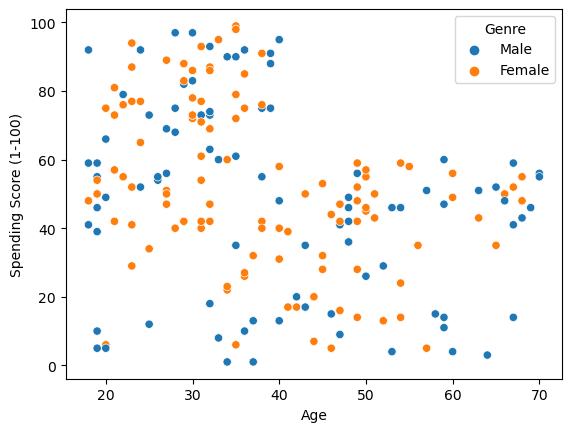

In [16]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Genre')

In [17]:
#this shows that the people of age group 40 and above do not spend much in the mall
#therefore the target customers should be of age below 40

In [18]:
df.groupby('Genre')['Spending Score (1-100)'].mean()

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

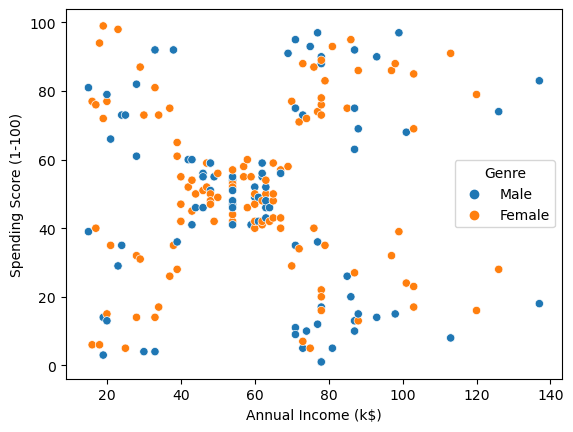

In [19]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Genre')

In [20]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [22]:
df.CustomerID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [52]:
linkage_matrix = linkage(df[['Annual Income (k$)','Spending Score (1-100)','Age','Genre_Male']], method='ward')

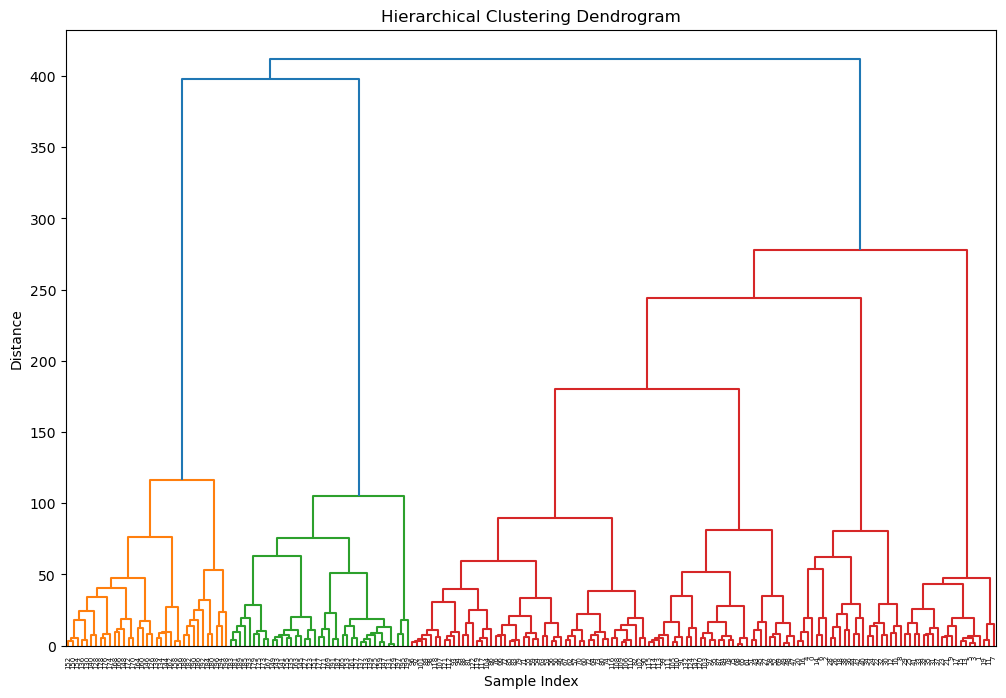

In [53]:

# Plot the dendrogram

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [54]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering

In [55]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')

In [56]:
# Fitting the model
y_cluster = hc_model.fit_predict(df)

In [57]:
df['hierarchical_cluster_pred'] = y_cluster

In [58]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,hierarchical_cluster_pred
0,1,19,15,39,1,2
1,2,21,15,81,1,2
2,3,20,16,6,0,2
3,4,23,16,77,0,2
4,5,31,17,40,0,2
...,...,...,...,...,...,...
195,196,35,120,79,0,0
196,197,45,126,28,0,0
197,198,32,126,74,1,0
198,199,32,137,18,1,0


In [59]:
df.hierarchical_cluster_pred.unique()

array([2, 1, 0], dtype=int64)

In [60]:
df[df.hierarchical_cluster_pred==0]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,hierarchical_cluster_pred
123,124,39,69,91,1,0
125,126,31,70,77,0,0
127,128,40,71,95,1,0
128,129,59,71,11,1,0
129,130,38,71,75,1,0
...,...,...,...,...,...,...
195,196,35,120,79,0,0
196,197,45,126,28,0,0
197,198,32,126,74,1,0
198,199,32,137,18,1,0


In [61]:
df[df.hierarchical_cluster_pred==1]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,hierarchical_cluster_pred
38,39,36,37,26,0,1
40,41,65,38,35,0,1
42,43,48,39,36,1,1
43,44,31,39,61,0,1
44,45,49,39,28,0,1
...,...,...,...,...,...,...
121,122,38,67,40,0,1
122,123,40,69,58,0,1
124,125,23,70,29,0,1
126,127,43,71,35,1,1


In [62]:
df[df.hierarchical_cluster_pred==2]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,hierarchical_cluster_pred
0,1,19,15,39,1,2
1,2,21,15,81,1,2
2,3,20,16,6,0,2
3,4,23,16,77,0,2
4,5,31,17,40,0,2
5,6,22,17,76,0,2
6,7,35,18,6,0,2
7,8,23,18,94,0,2
8,9,64,19,3,1,2
9,10,30,19,72,0,2


In [67]:
from sklearn.metrics import silhouette_score

silhouette_avg_heir = silhouette_score(df, df['hierarchical_cluster_pred'].values)
print(f"Silhouette Score (Using scikit-learn): {silhouette_avg_heir}")

Silhouette Score (Using scikit-learn): 0.38016871562803795


## (B) K-MEANS CLUSTERING

In [36]:
from sklearn.cluster import KMeans

In [38]:
dummy=pd.get_dummies(df,drop_first=True)

In [42]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dummy[['Genre_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

In [40]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75528.58656469136,
 58350.65449462818,
 51573.264799764795,
 44389.807673557676,
 40981.16387060345,
 37533.58640925383]

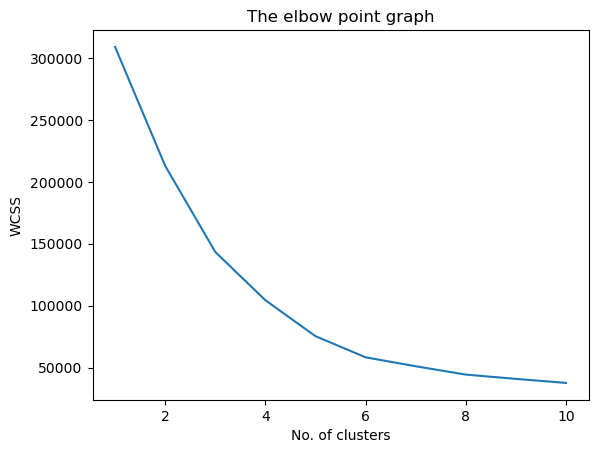

In [43]:
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
#selecting k value as 3

In [46]:
dummy.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Male', 'hierarchical_cluster_pred'],
      dtype='object')

In [47]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(dummy)
dummy['Cluster']=kmeans.labels_
print(dummy)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male  \
0             1   19                  15                      39           1   
1             2   21                  15                      81           1   
2             3   20                  16                       6           0   
3             4   23                  16                      77           0   
4             5   31                  17                      40           0   
..          ...  ...                 ...                     ...         ...   
195         196   35                 120                      79           0   
196         197   45                 126                      28           0   
197         198   32                 126                      74           1   
198         199   32                 137                      18           1   
199         200   30                 137                      83           1   

     hierarchical_cluster_pred  Cluster

In [64]:
dummy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,hierarchical_cluster_pred,Cluster
0,1,19,15,39,1,2,2
1,2,21,15,81,1,2,2
2,3,20,16,6,0,2,2
3,4,23,16,77,0,2,2
4,5,31,17,40,0,2,2


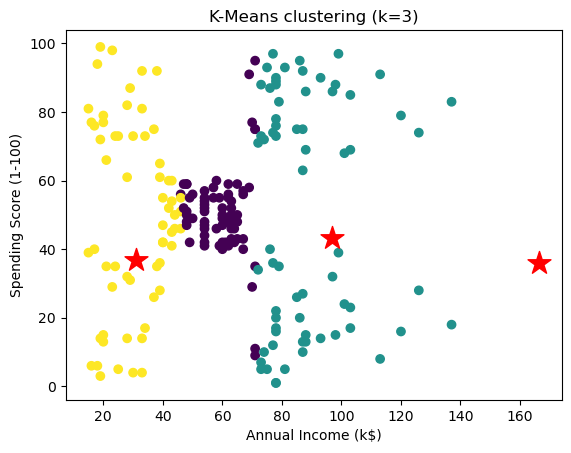

In [48]:
plt.scatter(dummy['Annual Income (k$)'],dummy['Spending Score (1-100)'],c=dummy['Cluster'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',marker='*',s=300)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means clustering (k=3)')
plt.show()

In [66]:
silhouette_avg_kmeans=silhouette_score(dummy[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']],dummy['Cluster'].values)
print('silhouette_score= ',silhouette_avg_kmeans)

silhouette_score=  0.16872678049468154


In [68]:
report=pd.DataFrame({'Model':['Hierarchical clustering','K-Means clustering'],'Silhouette score':[silhouette_avg_heir,silhouette_avg_kmeans]})

In [69]:
report

,Model,Silhouette score
0,Hierarchical clustering,0.380169
1,K-Means clustering,0.168727


# The scores show that Hierarchical method gives a better clustering for the mall customers